# Marker Selection 

In [56]:
import pandas as pd
from malariagen_data.pv4 import Pv4
import numpy as np
import os
import matplotlib.pyplot as plt

# Load Data 

In [57]:
pv4 = Pv4("gs://pv4_staging/")
variant_dataset = pv4.variant_calls(extended=True)

In [60]:
results_directory = 'sliding_window_results'
i=0
for filename in os.listdir(results_directory):
    f = os.path.join(results_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        df = pd.read_csv("sliding_window_results/PvP01_01_v1_windowed_heterozygosity.csv", index_col=0)
        # Add chromosome name columns 
        df.insert(loc=0, column='chrom', value=filename.replace('_windowed_heterozygosity.csv',''))
        # Join dataframes together 
        if i==0: 
            results_df = df
        else: 
            results_df = results_df.append(df)
        i+=1

In [61]:
results_df

,chrom,window_start,window_end,variant_counts,unique_allele_counts,unique_alleles_with_missing_index,unique_alleles_with_het_index,unique_allele_frequencies,unique_allele_count,entropy,het
0,PvP01_05_v1,121493,121692,1,[448 4 242],[],[1],"[0.6455331412103746, 0.005763688760806916, 0.3...",3,0.679625,0.461660
1,PvP01_05_v1,125343,125542,1,[622 2 70],[],[1],"[0.8962536023054755, 0.002881844380403458, 0.1...",3,0.346406,0.186548
2,PvP01_05_v1,135943,136142,1,[493 4 197],[],[1],"[0.7103746397694525, 0.005763688760806916, 0.2...",3,0.630098,0.414757
3,PvP01_05_v1,136993,137192,1,[ 1 399 4 290],[0],[2],"[0.001440922190201729, 0.5749279538904899, 0.0...",4,0.722002,0.494809
4,PvP01_05_v1,143393,143592,1,[ 1 559 4 130],[0],[2],"[0.001440922190201729, 0.8054755043227666, 0.0...",4,0.527137,0.316085
...,...,...,...,...,...,...,...,...,...,...,...
608,PvP01_14_v1,898709,898908,1,[525 4 165],[],[1],"[0.7564841498559077, 0.005763688760806916, 0.2...",3,0.582371,0.371172
609,PvP01_14_v1,902859,903058,1,[ 5 512 1 176],[0],[2],"[0.007204610951008645, 0.7377521613832853, 0.0...",4,0.617292,0.391354
610,PvP01_14_v1,902909,903108,2,[ 4 1 2 190 2 318 1 176],"[0, 1, 2]","[4, 6]","[0.005763688760806916, 0.001440922190201729, 0...",8,1.142487,0.650720
611,PvP01_14_v1,903059,903258,1,[ 6 190 2 496],[0],[2],"[0.008645533141210375, 0.2737752161383285, 0.0...",4,0.652655,0.414172


In [62]:
results_df.variant_counts.max()

7

In [41]:
# How many have het over 0.5 
results_df.loc[results_df['het']>0.5].shape

(2296, 11)

# Plot

Number of SNPs in each window across chromosomes 

In [53]:
man_colours = ['#C62828','#D81B60','#8E24AA','#5E35B1','#3949AB','#1E88E5','#039BE5','#00ACC1','#00897B','#43A047','#7CB342','#C0CA33','#FFB300','#F4511E']

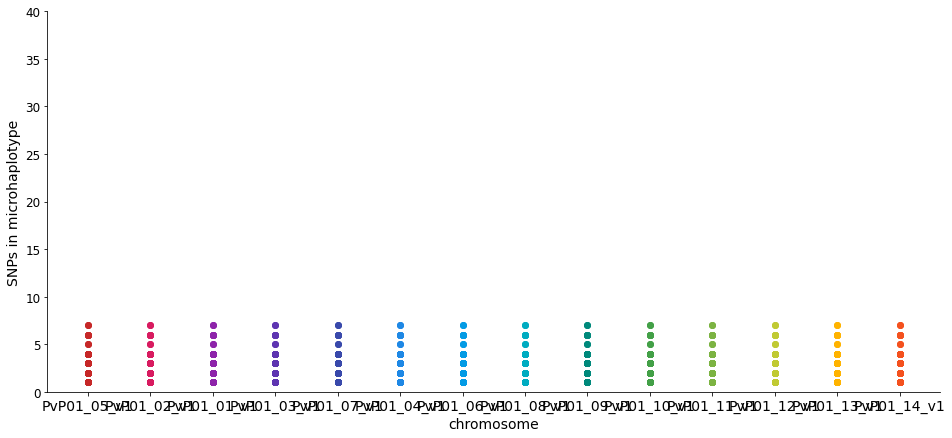

In [55]:
def plot_man():

    rcParams = plt.rcParams
    rcParams['font.size'] = 14
    rcParams['axes.labelsize'] = 14

    plt.rcParams['xtick.labelsize']=14
    plt.rcParams['ytick.labelsize']=12

    fig, ax = plt.subplots(figsize=(16, 7))

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # ax.set_xlim([0,chromosomes.loc['PvP01_14_v1','cumulative']+chromosomes.loc['PvP01_14_v1','length']])
    
    # ax.set_xticks(chromosomes['midpoint'])
    # ax.set_xticklabels(chromosomes['number'])
    
    ax.set_ylim([0,40])
    ax.set_xlabel('chromosome')
    ax.set_ylabel('SNPs in microhaplotype')
    
    i=0
    for chrom in results_df.chrom.unique(): 
        for index, row in results_df.loc[results_df['chrom']==chrom].iterrows():
            ax.scatter(row['chrom'], row['variant_counts'], c=man_colours[i],) 
        i+=1
                  # s=counts[chrm])
    # for chrm, c_items in chromosomes.iterrows():
    #     ax.scatter(window_mid[chrm]+c_items['cumulative'], counts[chrm], c=man_colours[int(c_items['number']%14)], 
    #               s=counts[chrm])


plot_man()
#matplotlib.pyplot.savefig('mhap_manhattan_rainbow_10142019.png', dpi=600)
#matplotlib.pyplot.savefig('mhap_manhattan_rainbow_transparent_10142019.png', transparent=True, dpi=600)

# Select Windows

**3-10 SNP Panel**
* SNPs 3-10, het>0.5

In [37]:
results_df.loc[(results_df['variant_counts'].between(3,10)) & (results_df['het']>0.5)]

,chrom,window_start,window_end,variant_counts,unique_allele_counts,unique_alleles_with_missing_index,unique_alleles_with_het_index,unique_allele_frequencies,unique_allele_count,entropy,het
145,PvP01_05_v1,347193,347392,3,[ 2 1 2 1 320 50 1 108 2 109 77 ...,"[0, 1, 2, 3]","[6, 8]","[0.002881844380403458, 0.001440922190201729, 0...",14,1.570518,0.720291
174,PvP01_05_v1,388043,388242,3,[178 2 185 3 59 1 2 90 28 1 1 1...,[],"[1, 3, 6, 9, 10]","[0.2564841498559078, 0.002881844380403458, 0.2...",13,1.765760,0.799434
182,PvP01_05_v1,395243,395442,3,[ 1 1 433 1 65 2 103 5 1 80 2],"[0, 1]","[3, 5, 8]","[0.001440922190201729, 0.001440922190201729, 0...",11,1.155262,0.566561
183,PvP01_05_v1,395293,395492,4,[ 1 149 1 317 44 2 1 1 66 2 1 ...,[0],"[2, 6, 7, 10, 11]","[0.001440922190201729, 0.21469740634005763, 0....",18,1.577884,0.716064
184,PvP01_05_v1,395343,395542,7,[ 1 65 1 7 1 67 1 7 1 206 1 ...,[0],"[2, 6, 8, 10, 12, 13, 22, 23, 28, 29]","[0.001440922190201729, 0.0936599423631124, 0.0...",38,2.399447,0.857751
...,...,...,...,...,...,...,...,...,...,...,...
554,PvP01_14_v1,836009,836208,4,[ 49 14 1 1 35 2 69 1 1 2 25 ...,"[16, 17]","[2, 3, 5, 7, 8, 9, 14, 15]","[0.07060518731988473, 0.020172910662824207, 0....",25,2.288150,0.844376
559,PvP01_14_v1,836659,836858,3,[ 3 30 1 33 1 14 350 61 1 1 1 ...,"[0, 1, 2, 13]","[4, 8, 9, 10, 11, 12]","[0.004322766570605188, 0.043227665706051875, 0...",18,1.623889,0.688113
560,PvP01_14_v1,836709,836908,3,[ 2 58 1 28 1 456 72 76],[0],"[2, 4]","[0.002881844380403458, 0.08357348703170028, 0....",8,1.125893,0.536891
562,PvP01_14_v1,836859,837058,3,[ 1 149 119 1 1 351 4 1 1 66],[0],"[3, 4, 8]","[0.001440922190201729, 0.21469740634005763, 0....",10,1.278060,0.659618
